In [55]:
#Manipulacion de datos
import pandas as pd
#Operaciones numéricas
import numpy as np
#Medicion del timepo que tarda ejecutar los procesos
from time import time
#Libreria para separar datos de entrenamiento y de prueba
from sklearn.model_selection import train_test_split
#Libreria para SVM
from sklearn.svm import SVC
#Medicion de precisio
from sklearn.metrics import accuracy_score, confusion_matrix
#Generar gráficos
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
#EXPLORACION Y MODIFICACION DE DATOS

In [60]:
#Leer el dataset
whiteWine_def = pd.read_csv('whitewinequality.csv', sep=";")
whiteWine_def

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [63]:
#En densidad existen valores muy altos en alguno de los registros,hay que eliminarlos

# Calcular los cuartiles y el rango intercuartílico
Q1 = whiteWine_def['density'].quantile(0.25)
Q3 = whiteWine_def['density'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar valores fuera del rango esperado (1.5 veces el IQR)
whiteWine_def = whiteWine_def[(whiteWine_def['density'] >= (Q1 - 1.5 * IQR)) & (whiteWine_def['density'] <= (Q3 + 1.5 * IQR))]

# Imprimir los diez valores más altos de la columna 'density'
top_10_density = whiteWine_def['density'].nlargest(40)
print(top_10_density)



0       1.00100
7       1.00100
182     1.00100
191     1.00100
1043    1.00100
103     1.00000
111     1.00000
292     1.00000
403     1.00000
813     1.00000
867     1.00000
1304    1.00000
1356    1.00000
1368    1.00000
1684    1.00000
1687    1.00000
1888    1.00000
1892    1.00000
1893    1.00000
2098    1.00000
2108    1.00000
2497    1.00000
2498    1.00000
2500    1.00000
38      0.99990
39      0.99990
410     0.99990
414     0.99990
630     0.99990
631     0.99990
1245    0.99990
2173    0.99990
2178    0.99990
773     0.99985
225     0.99980
229     0.99980
1156    0.99980
1157    0.99980
1159    0.99980
1161    0.99980
Name: density, dtype: float64


In [64]:
# Buscar si hay valores null
whiteWine_def.isnull().any()

fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [65]:
#Buscar que no haya defectos en los datos del nivel de alcohol
#No debe haber una desviacion muy por arriba del valor mas alto

# Ordenar los datos por la columna 'alcohol' en orden descendente
whiteWine_def_sorted = whiteWine_def.sort_values(by='alcohol', ascending=False)

# Mostrar los 30 registros con el nivel de alcohol más alto
top_10_alcohol = whiteWine_def_sorted.head(10)

# Mostrar el resultado
print(top_10_alcohol[['alcohol']])


      alcohol
3918    14.20
4503    14.05
3904    14.00
1099    14.00
3915    14.00
2945    14.00
3150    14.00
701     13.90
3458    13.90
4149    13.90


In [67]:
#Comprobar que no hay valores nulos ni NaN
whiteWine_def.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [66]:
#Comprobar el numero de valores unicos de cada columna
print ("Unique values are:\n",whiteWine_def.nunique())

Unique values are:
 fixed_acidity            68
volatile_acidity        124
citric_acid              87
residual_sugar          296
chlorides               160
free_sulfur_dioxide     131
total_sulfur_dioxide    247
density                 860
pH                      103
sulphates                79
alcohol                  80
quality                   7
dtype: int64


<Axes: title={'center': 'Correlation map for variables'}>

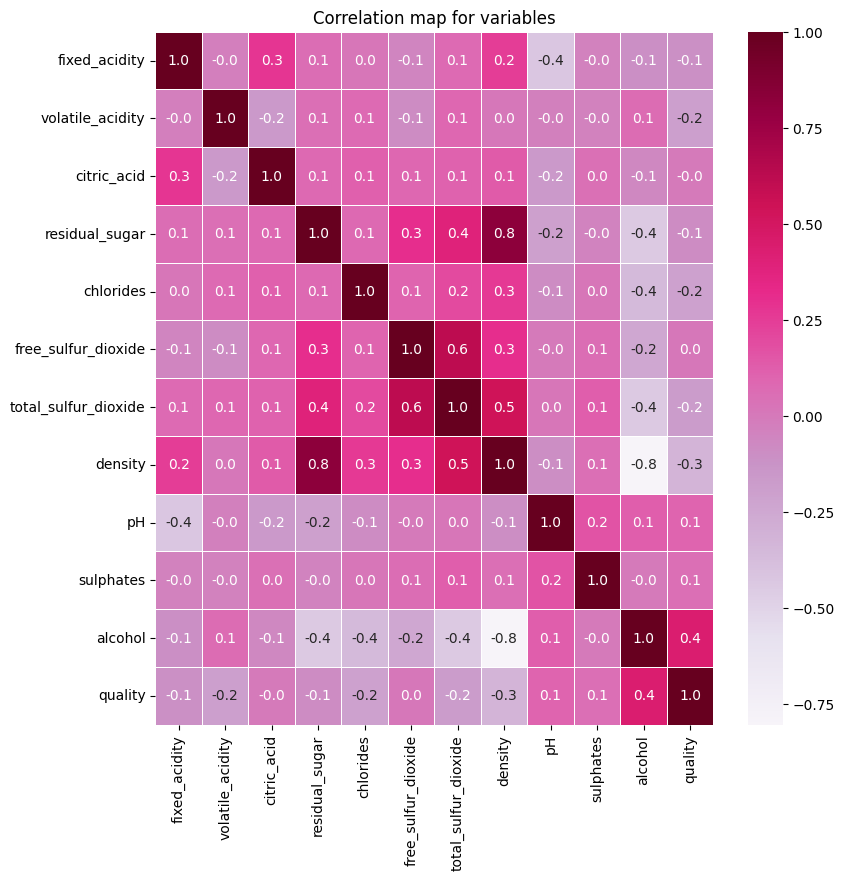

In [68]:
#Mapa de correlacion por parametros
#1: Correlación positiva perfecta. A medida que una variable aumenta, la otra también aumenta de manera proporcional.
#-1: Correlación negativa perfecta. A medida que una variable aumenta, la otra disminuye de manera proporcional.
#0: No hay correlación lineal. No hay una relación lineal discernible entre las dos variables.
f,ax = plt.subplots(figsize=(9, 9))
ax.set_title('Correlation map for variables')
sns.heatmap(whiteWine_def.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="PuRd")

C:\Users\a930960\AppData\Local\Temp\ipykernel_33880\2524138139.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.countplot(data=whiteWine_def, x = 'quality', palette='muted')


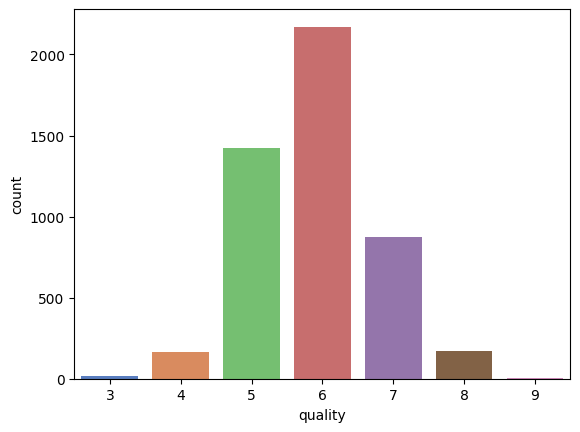

In [69]:
#Distribucion de la calida del vino
p = sns.countplot(data=whiteWine_def, x = 'quality', palette='muted')

In [73]:
#Valores de :media,min,max,total de registros,correlacion,ect....
whiteWine_def['quality'].describe()


count    4827.000000
mean        5.882536
std         0.885767
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [74]:
#Obtener los valores de los 30 mejores vinos blancos
#Esto servirá para mostrar las posibles mejoras que se le deben aplicar a un vino y para las gráficas
# Ordenar los datos en orden descendente por 'quality'
sorted_wines = whiteWine_def.sort_values(by='quality', ascending=False)

# Seleccionar los 30 vinos con mejor calidad
top_30_wines = sorted_wines.head(30)

# Aplicar el método .describe() a estos vinos
stats_description = top_30_wines.describe()
stats_description

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000
mean,7.233333,0.267333,0.345000,6.763333,0.043267,33.833333,131.916667,0.993318,3.159000,0.435000,11.09000,8.166667
std,0.624408,0.073669,0.065113,4.508095,0.023559,11.104778,35.621836,0.003111,0.126909,0.110196,1.26009,0.379049
min,6.200000,0.170000,0.240000,0.800000,0.018000,15.000000,83.000000,0.989420,2.940000,0.310000,8.50000,8.000000
25%,6.900000,0.202500,0.300000,2.025000,0.031250,28.250000,113.750000,0.990945,3.090000,0.332500,10.40000,8.000000
50%,7.250000,0.255000,0.340000,7.150000,0.034500,32.000000,124.500000,0.992900,3.140000,0.415000,11.20000,8.000000
75%,7.550000,0.357500,0.360000,10.050000,0.045000,38.750000,142.000000,0.994690,3.247500,0.500000,12.05000,8.000000
max,9.100000,0.370000,0.490000,14.200000,0.121000,57.000000,212.500000,1.000000,3.410000,0.760000,12.90000,9.000000


C:\Users\a930960\AppData\Local\Temp\ipykernel_33880\537917642.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.barplot(data=whiteWine_def, x = 'quality',y='alcohol', palette='muted')


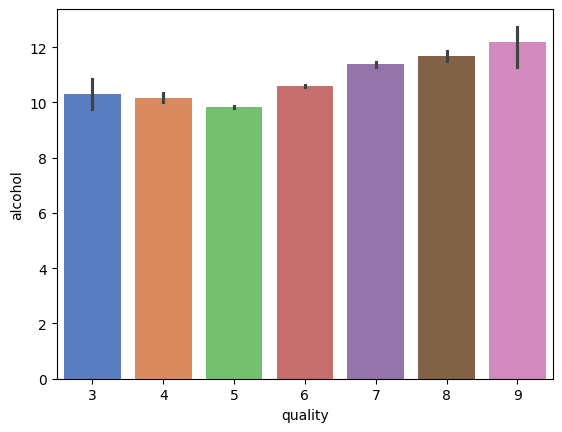

In [75]:
#Relacion de la calidad del vino y del alcohol
#Podemos ver como la correlacion es bastante alta
p = sns.barplot(data=whiteWine_def, x = 'quality',y='alcohol', palette='muted')

In [ ]:
#DEFINIR EL SET DE DATOS PARA LA PREDICCION

In [77]:
#dEFINIR X , y
#La x son todas las columnas menos la quality
X = whiteWine_def.drop(['quality'], axis=1)
#La y es las calidad ( output )
y = whiteWine_def['quality']

In [86]:
#Crear el dataset para la prediccion
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

# Comprobar 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (3861, 11)
y_train: (3861,)
X_test: (966, 11)
y_test: (966,)


In [85]:
# 1. Usar Random Forest Classifier
t0 = time()
# Cargar  random forest classifier 
from sklearn.ensemble import RandomForestClassifier

# Crear un  random forest Classifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

#Definicion del modelo


# ENTRENAMIENTO DEL MODELO
clf.fit(X_train, y_train)

# Predecir la respuesta
y_pred = clf.predict(X_test)
acc_rf = round(clf.score(X_test,y_test) * 100, 2)
#Importar scikit-learn metrics module para calcular la exactitud del modelo 
from sklearn import metrics

# evaluate accuracy
print("Exactitud del modelo:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print('El entrenamiento ha tardado', round(time() - t0, 3), 's')

Exactitud del modelo: 69.15113871635612 %
El entrenamiento ha tardado 0.442 s


In [88]:
import joblib

# Guardar el modelo en un archivo .pkl
joblib.dump(clf, 'white_wine_quality_model.pkl')

['white_wine_quality_model.pkl']